**Diamond Price Analysis**

**Introduction**

Diamonds are priced based on multiple attributes such as carat, cut, color, clarity, depth, and table.

This project aims to analyze these attributes and build a regression model to predict diamond prices.

**Requirements**

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Data Import**

In [ ]:
df = pd.read_csv("diamonds.csv")

In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Exploratory Data Analysis (EDA)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


**Data Visualization**

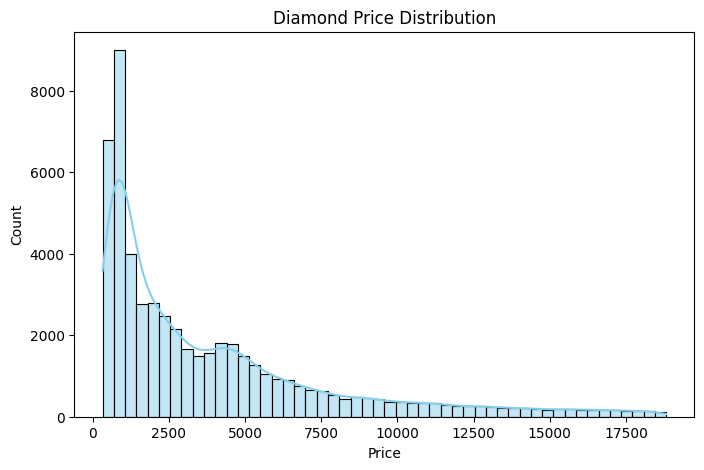

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=50, kde=True, color="skyblue")
plt.title("Diamond Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

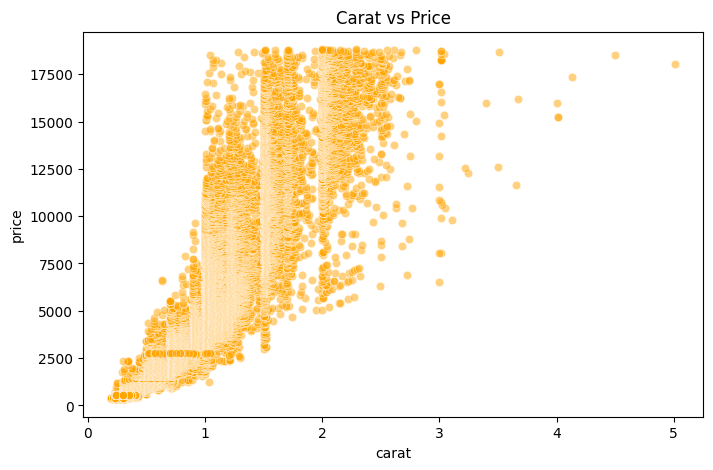

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="carat", y="price", data=df, alpha=0.5, color="orange")
plt.title("Carat vs Price")
plt.show()

<Axes: xlabel='cut', ylabel='price'>

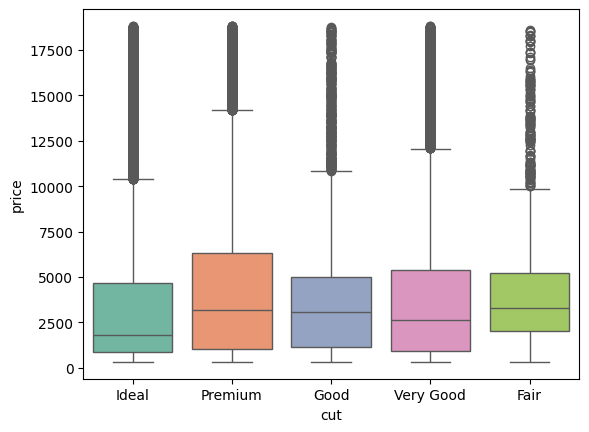

In [ ]:
palette = sns.color_palette("Set2")
sns.boxplot(x="cut", y="price", data=df, palette=palette)

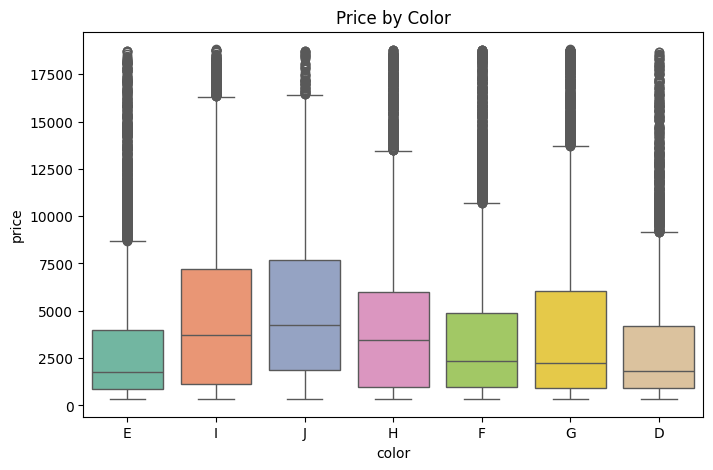

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="color", y="price", data=df, palette=palette)
plt.title("Price by Color")
plt.show()

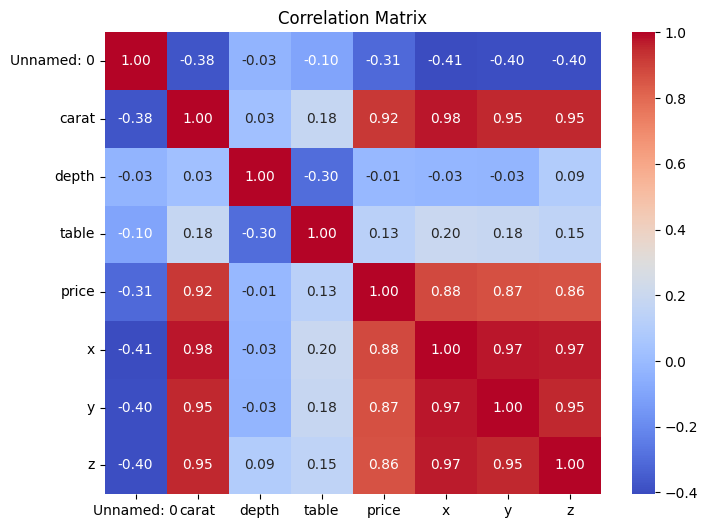

In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


**Modeling & Evaluation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np

X = df.drop(['price', 'Unnamed: 0'], axis=1)
y = df['price']

cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
], remainder='passthrough')

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SGDRegressor': SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
}

results = {}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    results[name] = {
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }

results

{'LinearRegression': {'R2': 0.9189331350419387,
  'MAE': 737.1513665933195,
  'RMSE': np.float64(1135.2116445190622)},
 'Ridge': {'R2': 0.9189375118281229,
  'MAE': 737.4106605588555,
  'RMSE': np.float64(1135.180999164087)},
 'Lasso': {'R2': 0.9189702605454437,
  'MAE': 736.026746171672,
  'RMSE': np.float64(1134.9516731346614)},
 'RandomForest': {'R2': 0.9809753922281078,
  'MAE': 270.2018471950021,
  'RMSE': np.float64(549.9370808829101)},
 'GradientBoosting': {'R2': 0.9674473884071069,
  'MAE': 398.0878736986421,
  'RMSE': np.float64(719.3629503000735)},
 'SGDRegressor': {'R2': -2205133.6942109475,
  'MAE': 5150388.6684295535,
  'RMSE': np.float64(5920695.272503847)}}

**Diamond Price Prediction Using RandomForest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pickle

X = df.drop(['price', 'Unnamed: 0'], axis=1)
y = df['price']

cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
], remainder='passthrough')

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2, mae, rmse

pickle.dump(model, open('diamond_randomforest.pkl', 'wb'))


In [ ]:
print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R2: 0.9809753922281078
MAE: 270.2018471950021
RMSE: 549.9370808829101


**Conclusion**

Various models were tested for diamond price prediction: LinearRegression, Ridge, Lasso, GradientBoosting, SGDRegressor, and RandomForest.

Based on performance metrics (R², MAE, RMSE), RandomForest gave the best results:

- R² ≈ 0.981

- MAE ≈ 270

- RMSE ≈ 550

GradientBoosting was the second-best model, while linear models had higher error values. SGDRegressor performed poorly on the large dataset.

In conclusion, the RandomForest model is reliable and highly accurate for predicting diamond prices.